# Taller de IA Generativa

In [1]:
# !pip install openai  # Mínimo
# !pip install ipyreact tiktoken numpy  # Óptimo

In [2]:
import os

from tools import *

Si prefieres colores adaptados para daltonismo ejecuta la siguiente línea :)

```python
set_default_colors(colorblind_pallete)
```

In [3]:
# Añade tu api key aquí
# os.environ["OPENAI_API_KEY"] = "sk-pro....xxxx"

> ⚠️ **Es muy peligroso usar las API Key desde el notebook. Desactivala al acabar el taller**
>
> **Debes desactivarla pues Jupyter guarda versiones antiguas de tus notebooks**

In [4]:
check_openai()

Todo está ok! :)


True

In [5]:
# Creamos el cliente para los siguientes ejercicios
import openai
client = openai.OpenAI()

### Ejercicio 0: ¿Cómo de peligroso es dejar una API key en un notebook?

a) No mucho, es peor dejar la contraseña de mi ordenador en un postit.

b) Un poquito, si la borro después no pasa nada.

```c) Terrible.```

## 1.1. Tokens

Token = fragmento de un texto (o de una imagen, o un audio, o un vídeo, ...)

### Ejercicio 1: Vamos a tokenizar!

- 1a. Practica con él. Intenta deducir cómo funciona (fíjate en los números).
> El tokenizador asigna números más bajos a tokens más populares.
- 1b. ¿Qué ocurre cuando **añades** texto?
> El tokenizador intenta utilizar el token más largo que conoce, un tokenizador con ás tokens dividirá menos el prompt.  
> El final del prompt es imporante. Un espacio, una coma o dos puntos sugieren una continuación pero un punto es un cambio de tema o un final.
> Darle propina, animarle o pedírselo por favor suele mejorar los resultados.
- 1c. Prueba palabras con ñ y emojis
> Hay secuencias conocidas de tokens que son características de OpenAi o que permiten "romper" el LLM.
- 1d. Compara el # de tokens en inglés y en español
> Las palabras en inglés tienen números más bajos que las equivalentes en Español (hay más texto en inglés en el corpus de entrenamiento).

In [ ]:
InteractiveTokenizer()

Tokenizador con 100K tokens
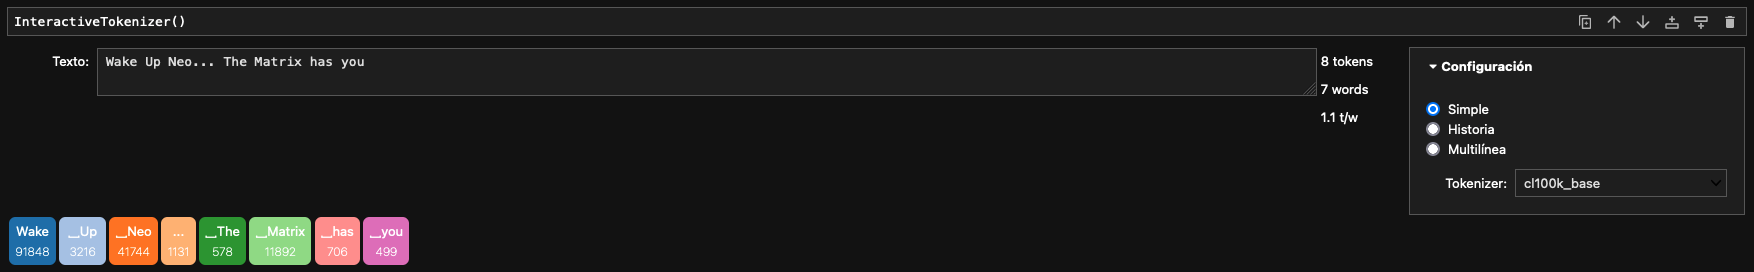

Tokenizados con 50k tokens
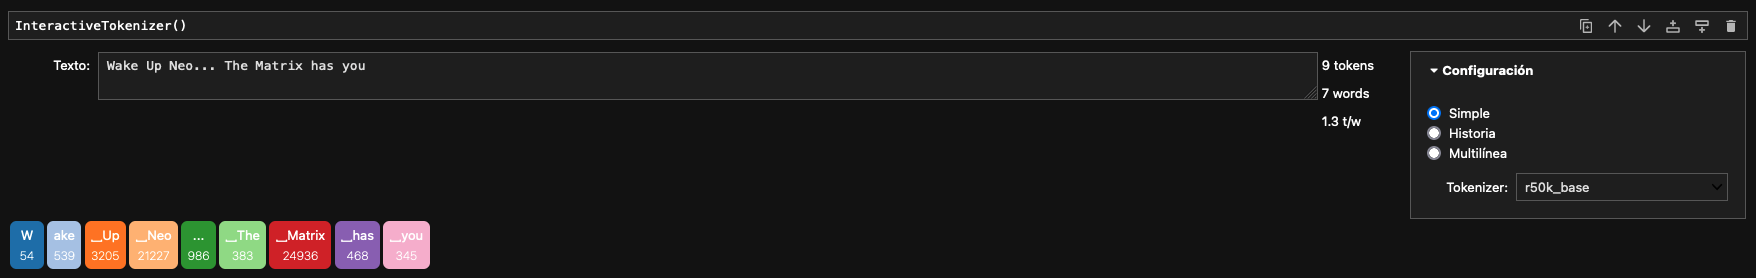

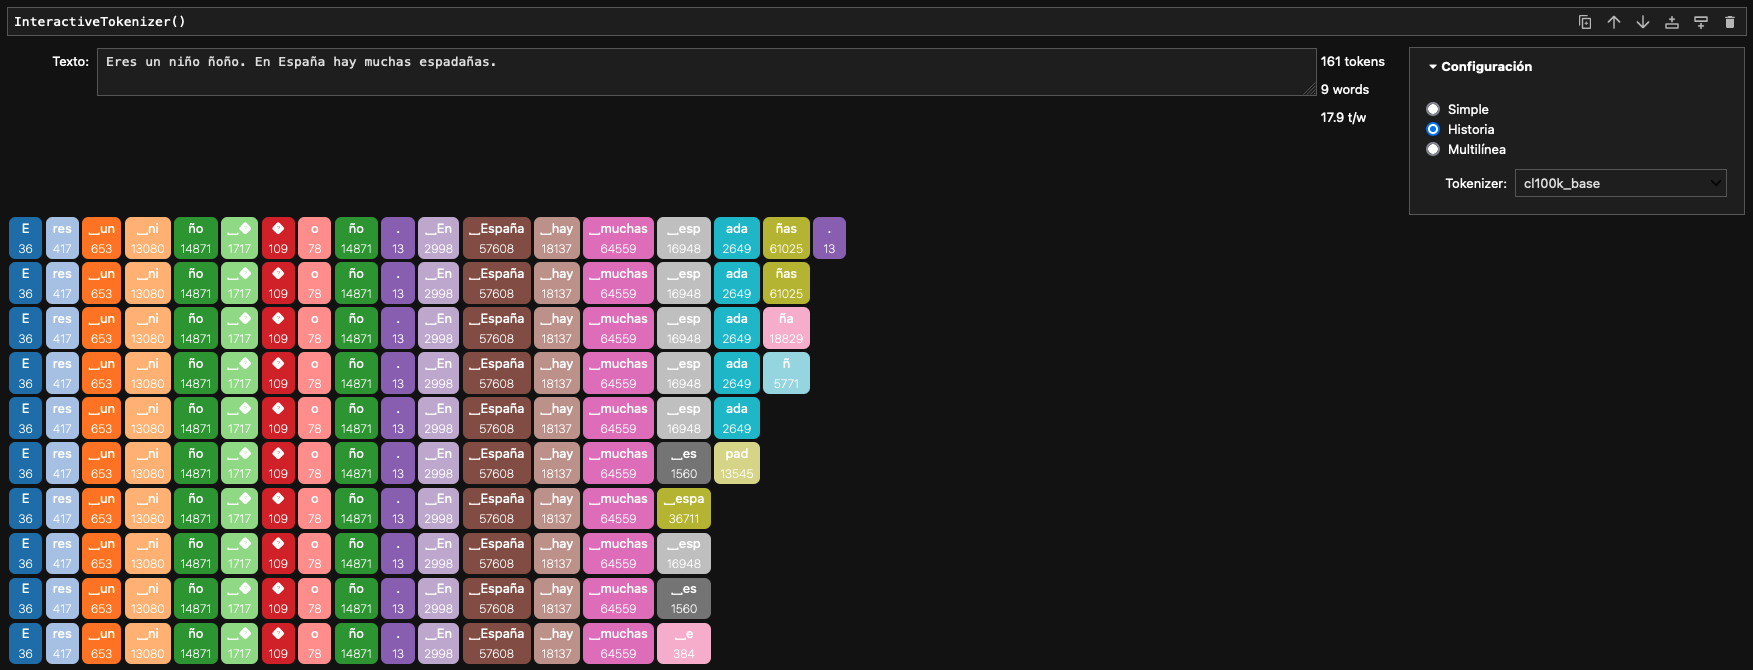

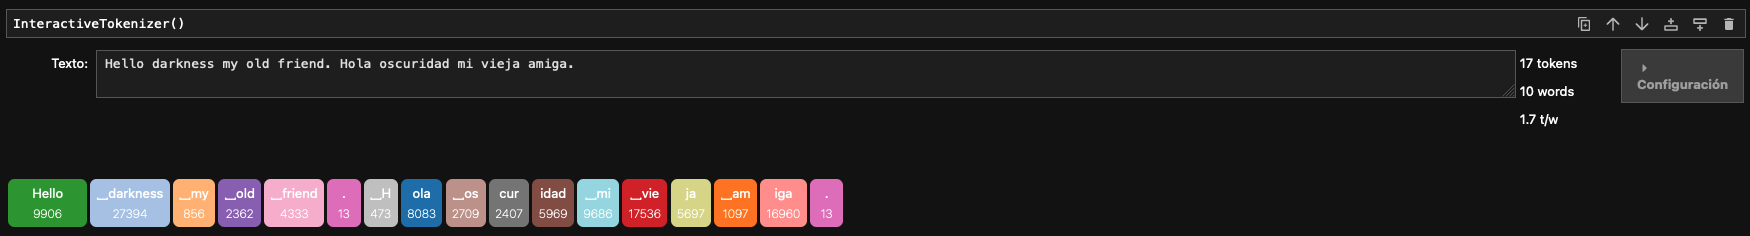

## 1.2. Embeddings

**Embedding** = vector (lista) de números que representa su significado. Cada token tiene un **embedding**.

### Ejercicio 2: Embeddings

Usa esta función para generar el embedding de un texto cualquiera

In [29]:
",".join([str(x) for x in get_embedding("Pizza con piña")])

'-0.0038863406516611576,-0.054469022899866104,-0.029600823298096657,-0.013365287333726883,0.008555974811315536,-0.012214995920658112,0.003812393406406045,0.05714207887649536,0.001134543097577989,-0.05477576702833176,-0.0021691203583031893,0.021800754591822624,0.012981856241822243,-0.014329340308904648,0.002107497537508607,-0.01040191762149334,0.014044506475329399,-0.021099625155329704,0.010100651532411575,0.03751044347882271,0.042812738567590714,0.001326942932792008,-0.016827115789055824,-0.021724069491028786,0.01914960704743862,0.05350496992468834,0.0007716536056250334,0.020749060437083244,0.026138994842767715,-0.025832250714302063,0.02447381243109703,-0.022633345797657967,0.025481685996055603,-0.024955838918685913,0.025613147765398026,-0.022173229604959488,-0.006567614618688822,0.02716878056526184,-0.04046833515167236,0.019127696752548218,0.003401575144380331,0.0421554297208786,-0.007033208385109901,0.011075659655034542,0.041191376745700836,-0.02329065650701523,-0.07015680521726608,0

---

Tenemos las variables `maths`, `emojis`, `python_code`, `cute` y `tweets` con ejemplos de **documentos** o **chunks**

In [24]:
maths, "", tweets

(['The Pythagorean theorem states that in a right-angled triangle, the square of the length of the hypotenuse is equal to the sum of the squares of the lengths of the other two sides.',
  'La fórmula para calcular el área de un círculo es: $A = \\pi r^2$, donde $A$ es el área y $r$ es el radio.',
  'The quadratic formula is used to solve quadratic equations. It is given by: $x = \\frac{-b \\pm \\sqrt{b^2 - 4ac}}{2a}$, where $a$, $b$, and $c$ are the coefficients of the quadratic equation $ax^2 + bx + c = 0$.',
  'El teorema fundamental del cálculo establece una relación entre la derivada y la integral de una función. Se expresa como: $\\int_a^b f(x) dx = F(b) - F(a)$, donde $F(x)$ es una antiderivada de $f(x)$.',
  'La serie de Fibonacci es una sucesión de números en la que cada número es la suma de los dos anteriores. Los primeros términos son: 0, 1, 1, 2, 3, 5, 8, 13, 21, ...',
  "The Euler's identity is a remarkable mathematical formula that connects the fundamental constants $e$, $

Visualiza cada una de estos bloques por separado, luego combinalos y prueba con ejemplos tuyos (requiere numpy y matplotlib).

```python
viz_embeddings(maths)
viz_embeddings(maths + tweets)
viz_embeddings(maths + tweets + cute + emojis + python_code + ["Lo que sea", "Blah", ...])
# ...
```

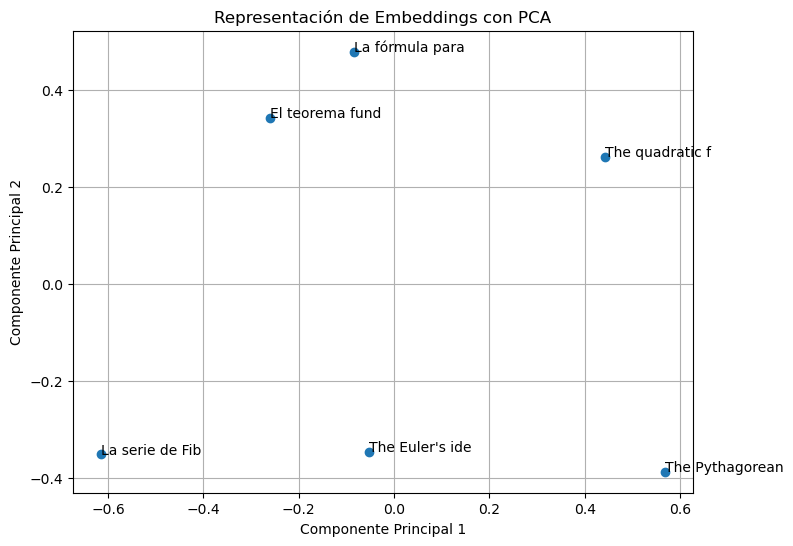

In [34]:
viz_embeddings(maths)

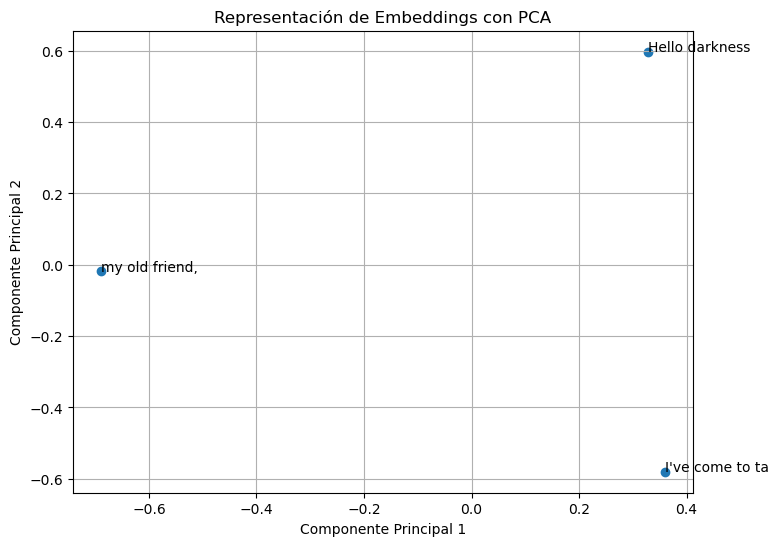

In [38]:
viz_embeddings(["Hello darkness ", "my old friend, ", "I've come to talk with you again"])

## 1.3. Transformers

- Arquitectura utilizada en las LLM
- Basada en el mecanismo de **atención**
- Permite procesar secuencias de longitud variable
- Captura dependencias a largo plazo

In [ ]:
# Esto solo lo ejecuta el profe ;) Avisados quedáis.

In [ ]:
# from tools.attention import *

In [39]:
# interact_attention()

### Beam search

- Algoritmo utilizado para generar texto
- Explora múltiples posibilidades en paralelo

In [142]:
client.completions.create??

Signature:
client.completions.create(
    *,
    model: "Union[str, Literal['gpt-3.5-turbo-instruct', 'davinci-002', 'babbage-002']]",
    prompt: 'Union[str, List[str], Iterable[int], Iterable[Iterable[int]], None]',
    best_of: 'Optional[int] | NotGiven' = NOT_GIVEN,
    echo: 'Optional[bool] | NotGiven' = NOT_GIVEN,
    frequency_penalty: 'Optional[float] | NotGiven' = NOT_GIVEN,
    logit_bias: 'Optional[Dict[str, int]] | NotGiven' = NOT_GIVEN,
    logprobs: 'Optional[int] | NotGiven' = NOT_GIVEN,
    max_tokens: 'Optional[int] | NotGiven' = NOT_GIVEN,
    n: 'Optional[int] | NotGiven' = NOT_GIVEN,
    presence_penalty: 'Optional[float] | NotGiven' = NOT_GIVEN,
    seed: 'Optional[int] | NotGiven' = NOT_GIVEN,
    stop: 'Union[Optional[str], List[str], None] | NotGiven' = NOT_GIVEN,
    stream: 'Optional[Literal[False]] | Literal[True] | NotGiven' = NOT_GIVEN,
    stream_options: 'Optional[ChatCompletionStreamOptionsParam] | NotGiven' = NOT_GIVEN,
    suffix: 'Optional[str] | NotG

In [43]:
response = client.completions.create(model="davinci-002", prompt="¿Conoces el camino a Mordor?")
response

Completion(id='cmpl-9NngdXwQjr93cQyNoRcIYXO01cvyM', choices=[CompletionChoice(finish_reason='length', index=0, logprobs=None, text=' Seven hundred miles through Elben land, to the White City, where the Kings')], created=1715459567, model='davinci-002', object='text_completion', system_fingerprint=None, usage=CompletionUsage(completion_tokens=16, prompt_tokens=11, total_tokens=27))

In [45]:
response.choices

[CompletionChoice(finish_reason='length', index=0, logprobs=None, text='\n\nSoy una inteligencia artificial y no tengo la capacidad de conocer caminos')]

Vamos a ver el uso:

In [46]:
response.__dict__

{'id': 'cmpl-9NngeYfpiFUc3zTovffAbkiJliKMa',
 'choices': [CompletionChoice(finish_reason='length', index=0, logprobs=None, text='\n\nSoy una inteligencia artificial y no tengo la capacidad de conocer caminos')],
 'created': 1715459568,
 'model': 'gpt-3.5-turbo-instruct',
 'object': 'text_completion',
 'system_fingerprint': None,
 'usage': CompletionUsage(completion_tokens=16, prompt_tokens=11, total_tokens=27)}

### Ejercicio 3: Analiza el efecto de los parámetros: model, temperature, top_p

a) Compara davinci-002 con gpt-3.5-turbo-instruct

In [43]:
response = client.completions.create(model="davinci-002", prompt="¿Conoces el camino a Mordor?")
response

Completion(id='cmpl-9NngdXwQjr93cQyNoRcIYXO01cvyM', choices=[CompletionChoice(finish_reason='length', index=0, logprobs=None, text=' Seven hundred miles through Elben land, to the White City, where the Kings')], created=1715459567, model='davinci-002', object='text_completion', system_fingerprint=None, usage=CompletionUsage(completion_tokens=16, prompt_tokens=11, total_tokens=27))

In [44]:
response = client.completions.create(model="gpt-3.5-turbo-instruct", prompt="¿Conoces el camino a Mordor?")
response

Completion(id='cmpl-9NngeYfpiFUc3zTovffAbkiJliKMa', choices=[CompletionChoice(finish_reason='length', index=0, logprobs=None, text='\n\nSoy una inteligencia artificial y no tengo la capacidad de conocer caminos')], created=1715459568, model='gpt-3.5-turbo-instruct', object='text_completion', system_fingerprint=None, usage=CompletionUsage(completion_tokens=16, prompt_tokens=11, total_tokens=27))

b) Usando "gpt-3.5-turbo-instruct" cambia la temperatura (y fija el `seed`)

c) Usando "gpt-3.5-turbo-instruct" cambia el top_p (y fija el `seed` y `temperature`)

## 1.4. Prompt Engineering "a mano"

- ¿Qué es prompt engineering?
- Diseño de prompts efectivos
- Ejemplos de prompt engineering:
  - Prompt básico de 1 paso
  - Prompt con tools
  - Prompt con RAG

### Prompt básico de 1 paso

- Ejemplo: explicador de código de Python
- Diseño del prompt para obtener explicaciones de código

```python
# PSEUDOCODIGO
def explica_codigo(codigo):
    prompt = f"""
Explica el siguiente código de Python:

{codigo}

Explicación:
"""
    respuesta = genera_texto(prompt)
    return respuesta
```

### Actividad 4: Crea tu chatbot!

Nivel 1: Crea un chatbot que explique un código de Python

In [166]:
chunk_1 = """
def fibonacci(n):
    if n <= 0:
        return "Oops!."
    elif n == 1:
        return 0
    elif n == 2:
        return 1
    else:
        return fibonacci(n-1) + fibonacci(n-2)

print(fibonacci(10))
"""

chunk_2 = """
function fibonacci(n: number): number | string {
    if (n <= 0) {
        return "Oops!";
    } else if (n == 1) {
        return 0;
    } else if (n == 2) {
        return 1;
    } else {
        return fibonacci(n - 1) + fibonacci(n - 2);
    }
}

console.log(fibonacci(10));
"""

chunk_3 = """
You don't deserve so much attention
"""

In [167]:
def explain_py(chunk):
    prompt = f"""
Please, explain the next python code:

```
{chunk}
```

You MUST only return explanations of code.
If the chunk provided is not python code "This is not python code".
If the chunk provided is not code you should return "Oops!". THIS IS VERY IMPORTANT!

Please write down your explanation of the python code provided below this line:
"""

    llm_answer = client.completions.create(model="gpt-3.5-turbo-instruct",
                                           prompt=prompt,
                                           max_tokens=1000,
                                           seed=42,
                                           temperature=0).choices[0].text

    for i in llm_answer.splitlines()[1::2]:
        print(i)
    
    return None

In [168]:
explain_py(chunk_1)
print("-" * 80)
explain_py(chunk_2)
print("-" * 80)
explain_py(chunk_3)

The code defines a function called "fibonacci" that takes in a parameter "n". The function checks if the value of "n" is less than or equal to 0, and if so, it returns the string "Oops!". If "n" is equal to 1, the function returns the value 0. If "n" is equal to 2, the function returns the value 1. If none of these conditions are met, the function recursively calls itself with the parameters "n-1" and "n-2" and adds the results together. This continues until "n" reaches 1 or 2, at which point the function returns the corresponding value. The code then calls the function with the value 10 and prints the result. Therefore, the code is calculating the 10th number in the Fibonacci sequence, which is 34.
--------------------------------------------------------------------------------
The code provided is a function called "fibonacci" that takes in a number as a parameter and returns either a number or a string. The function first checks if the number is less than or equal to 0, in which cas

___
Nivel 2: Crea un chatbot que comente una función de Python

In [169]:
def comment_py(chunk):
    prompt = f"""
Please, expand the next python code with all the needed comments that explain what the code is doing:

The code starts here:
```python
{chunk}
```
End of code.

You MUST only return the original code with comments and NO explanation.
If the chunk provided is not python code "This is not python code".
If the chunk provided is not code you should return "Oops!". THIS IS VERY IMPORTANT!

Please write down the original code with all the needed comments that explain the code below this line:
"""

    llm_answer = client.completions.create(model="gpt-3.5-turbo-instruct",
                                           prompt=prompt,
                                           max_tokens=1000,
                                           seed=42,
                                           temperature=0.5).choices[0].text

    for i in llm_answer.splitlines()[1::2]:
        print(i)
    
    return None

In [170]:
comment_py(chunk_1)
print("-" * 80)
comment_py(chunk_2)
print("-" * 80)
comment_py(chunk_3)

# This is a function that calculates the nth term in the Fibonacci sequence.
# The first two numbers in the sequence are 0 and 1, and the sequence continues infinitely.
def fibonacci(n):
    # If n is less than or equal to 0, the function will return the string "Oops!".
        return "Oops!."
    elif n == 1:
    # If n is equal to 2, the function will return 1.
        return 1
    # The nth term is calculated by adding the previous two terms in the sequence.
        return fibonacci(n-1) + fibonacci(n-2)
# The function is called with the argument 10, which will calculate the 10th term in the sequence.

--------------------------------------------------------------------------------
# This is not python code
--------------------------------------------------------------------------------
Oops!


___
Nivel 2: Crea un chatbot que **corrija** un código de Python **si tiene un error**

In [181]:
def fix_py(chunk):
    llm_answer = client.chat.completions.create(model="gpt-3.5-turbo-1106",
                                                max_tokens=1000,
                                                messages= [
                                                    {
                                                        "role": "system",
                                                        "content": "You are an experienced python programmer. The user will provide python code and your job is to fix all the errors you find and provide an explanation of the corrections."
                                                    },
                                                    {
                                                        "role": "user",
                                                        "content": chunk
                                                    }
                                                ],
                                                seed=42,
                                                temperature=0.5).choices[0].message.content
    
    for i in llm_answer.splitlines()[1::2]:
        print(i)
    
    return None

In [182]:
fix_py("""
def calculate_sum(numb1, numb2):
    result = numb1 + numb
    print("The sum is: ", reslt)
    return result

calculate_sum(5, '10')
""")


2. In the function, the variable `result` is assigned the value of `numb1 + numb` which should be `numb1 + numb2`.
4. The function is called with the second argument as a string '10' instead of an integer.
Here's the corrected code:
```python
    result = numb1 + numb2
    return result
calculate_sum(5, 10)

1. Fixed the parameter names to `numb1` and `numb2`.
3. Corrected the variable name in the `print` statement to `result`.


___
#

### Prompt con tools

- Integración de herramientas externas en los prompts
- Ejemplo: chatbot con intérprete de Python

```python
def chatbot_interprete(entrada):
    prompt = f"""
Eres un chatbot con acceso a un intérprete de Python. Puedes ejecutar comandos de Python y devolver el resultado. Para ejecutar el intérprete debes....

Usuario: {entrada}
"""
    respuesta = genera_texto(prompt)
    resultado = ejecuta_python(respuesta)
    return resultado
```

Actividad 5: Crea tu con una herramienta

Nivel 1: Crea un chatbot que calcule operaciones matemáticas

Nivel 2: Crea un chatbot que ejecute un código de Python y lo corrija en base a lo necesario.

### Prompt con RAG

- Generación de respuestas basada en recuperación (RAG)
- Ejemplo: chatbot de dudas sobre la Python standard library

```python
def chatbot_rag(pregunta):
    prompt = f"""
Eres un chatbot experto en la biblioteca estándar de Python. Utiliza la siguiente base de conocimientos para responder a la pregunta del usuario:

Base de conocimientos: {recupera_info_relevante(pregunta)}

Usuario: {pregunta}
"""
    respuesta = genera_texto(prompt)
    return respuesta
```

### Actividad 6: Crea tu RAG

(Opcional si queda tiempo!)

# Muchas gracias

Alejandro Vidal

alex@mindmake.rs

[@doblepensador](https://twitter.com/doblepensador)